In [44]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
from tensorflow import keras

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [46]:
PATH = "../data/unpacked/characters"

characters = os.listdir(PATH)

im_arr=[]
lb_arr=[]
for i, character in enumerate(characters):
    path = os.path.join(PATH, character)

    for d in sorted(os.listdir(path)):
        img = cv2.imread(os.path.join(path, d),0)
        img = cv2.resize(img, (32, 32))

        temp_arr=img
        temp_arr=temp_arr[np.newaxis,:,:]
        if len(im_arr)==0:
            im_arr=temp_arr
        else:
            im_arr=np.concatenate((im_arr,temp_arr),axis=0)
        lb_arr.append(character)

In [47]:
# convert the labels to one-hot encoding
from sklearn import preprocessing

lb_arr=np.array(lb_arr)
le = preprocessing.LabelEncoder()
le.fit(lb_arr)
new_labels = le.transform(lb_arr)

Prepare the data

In [48]:
# LeNet preprocces architecture
X_train, X_test, Y_train, Y_test = train_test_split(im_arr, new_labels, test_size=0.2, random_state=42, stratify=new_labels)

# expand dims for required input shape
X_train = tf.expand_dims(X_train, axis=3, name=None) / 255
X_test = tf.expand_dims(X_test, axis=3, name=None) / 255

X_train.shape

TensorShape([4429, 32, 32, 1])

In [65]:
laNet = models.Sequential([
    layers.Conv2D(6,5, activation='tanh', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(2),
    layers.Activation('sigmoid'),
    layers.Conv2D(16, 5, activation='tanh'),
    layers.AveragePooling2D(2),
    layers.Activation('sigmoid'),	
    layers.Conv2D(120, 5, activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(27, activation='softmax')
])

laNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_6 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_7 (Activation)   (None, 5, 5, 16)         

In [66]:
laNet.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [57]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [ ]:
laNet.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [67]:
# history_laNet = laNet.fit(x=X_train, y=Y_train, epochs=40,batch_size=64, validation_data=(X_train, Y_train), validation_split=0.2)
history_laNet = laNet.fit(x=X_train, y=Y_train, epochs=40,batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/40
70/70 [==============================] - 1s 7ms/step - loss: 3.1327 - sparse_categorical_accuracy: 0.0515 - val_loss: 3.1146 - val_sparse_categorical_accuracy: 0.0542
Epoch 2/40
70/70 [==============================] - 0s 6ms/step - loss: 3.1035 - sparse_categorical_accuracy: 0.0551 - val_loss: 3.1158 - val_sparse_categorical_accuracy: 0.0542
Epoch 3/40
70/70 [==============================] - 0s 6ms/step - loss: 3.1094 - sparse_categorical_accuracy: 0.0515 - val_loss: 3.0999 - val_sparse_categorical_accuracy: 0.0542
Epoch 4/40
70/70 [==============================] - 0s 6ms/step - loss: 3.0975 - sparse_categorical_accuracy: 0.0646 - val_loss: 3.0766 - val_sparse_categorical_accuracy: 0.0542
Epoch 5/40
70/70 [==============================] - 0s 6ms/step - loss: 2.8767 - sparse_categorical_accuracy: 0.1689 - val_loss: 2.2967 - val_sparse_categorical_accuracy: 0.3574
Epoch 6/40
70/70 [==============================] - 0s 7ms/step - loss: 1.7311 - sparse_categorical_accuracy: 

In [69]:
prediction = laNet.predict(X_test)

35/35 [==============================] - 0s 2ms/step


In [68]:
laNet.evaluate(X_test, Y_test)

35/35 [==============================] - 0s 2ms/step - loss: 0.4013 - sparse_categorical_accuracy: 0.8899


[0.4013054668903351, 0.8898916840553284]

In [70]:
# get prediction 
test = np.argmax(prediction, axis=1)
test

array([23, 16, 21, ..., 13,  5,  4])

In [71]:
from sklearn.metrics import classification_report
stats = classification_report(le.inverse_transform(Y_test), le.inverse_transform(test))
print(stats)

              precision    recall  f1-score   support

        Alef       0.93      0.95      0.94        60
        Ayin       0.95      0.97      0.96        60
         Bet       0.80      0.87      0.83        60
       Dalet       0.67      0.67      0.67        18
       Gimel       0.80      0.98      0.88        60
          He       0.92      0.95      0.93        60
         Het       1.00      0.93      0.97        60
         Kaf       0.92      0.62      0.74        39
   Kaf-final       0.00      0.00      0.00         2
       Lamed       0.92      0.95      0.93        59
         Mem       0.96      0.90      0.93        60
  Mem-medial       0.93      0.93      0.93        60
   Nun-final       0.81      0.65      0.72        26
  Nun-medial       0.85      0.92      0.88        60
          Pe       0.67      0.29      0.40         7
    Pe-final       0.00      0.00      0.00         3
         Qof       0.85      0.94      0.89        53
        Resh       0.56    

/workspaces/Dead-Sea-Scrolls/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspaces/Dead-Sea-Scrolls/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspaces/Dead-Sea-Scrolls/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [20]:
le.inverse_transform(Y_test)

array(['Tsadi-medial', 'Qof', 'Tet', ..., 'Nun-medial', 'He', 'Gimel'],
      dtype='<U12')

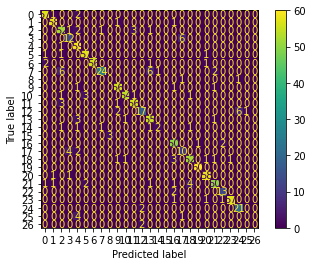

In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from matplotlib.pyplot import figure


# cm = confusion_matrix(le.inverse_transform(Y_test), le.inverse_transform(test))
cm = confusion_matrix(le.inverse_transform(Y_test), le.inverse_transform(test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# figure(figsize=(20, 20), dpi=380)

disp.plot()
plt.show()
# plot larger figure

In [ ]:
# plot the loss and accuracy curves for training and validation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


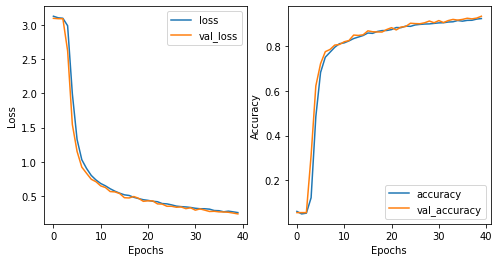

In [64]:
#plod lanet val
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_laNet.history["loss"], label="loss")
plt.plot(history_laNet.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#plot model accuracy
plt.subplot(1, 2, 2)
plt.plot(history_laNet.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history_laNet.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# #
# plt.subplot(1, 2, 2)
# plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
# plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
